In [9]:
from cProfile import label
from pickletools import read_uint1

import torch
import matplotlib.pyplot as plt
import matplotlib_inline
from networkx.algorithms.bipartite import color

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [10]:
x = torch.linspace(-3,3,101)

# create a function that returns the activated output
def NNOutputX(actfunc):
    # get activation function type
    # replaces torch.relu with torch.<actfunc>
    actfunc = getattr(torch, actfunc)
    return actfunc(x)

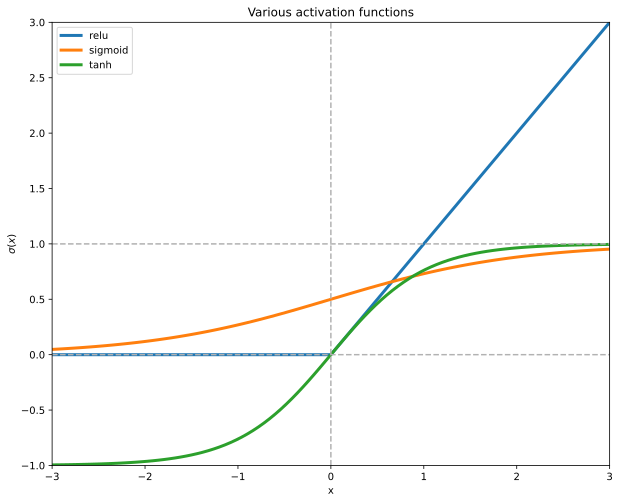

In [11]:
# activation functions
activation_funcs =["relu","sigmoid","tanh"]

fig = plt.figure(figsize=(10,8))

for actfunc in activation_funcs:
    plt.plot(x,NNOutputX(actfunc),label=actfunc,linewidth=3)
    
dashLined = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashLined)
plt.plot(x[[0,-1]],[1,1],'--',color=dashLined)
plt.plot([0,0],[-1,3],'--',color=dashLined)

plt.legend()
plt.xlabel('x')
plt.ylabel ('$\sigma(x)$')
plt.title("Various activation functions")
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
plt.show()

## Activation functions in torch.nn

In [12]:
# this function is different from the prev function
def NNoutput(actfun):
    # this code replace torch.nn.relu with torch.nn.<actfun>
    actfunc = getattr(torch.nn, actfun)
    return actfunc()

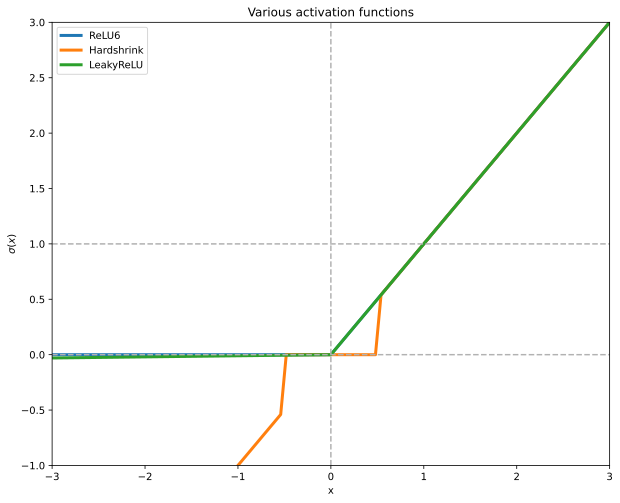

In [16]:
activation_funcs = ["ReLU6","Hardshrink","LeakyReLU"]

fig = plt.figure(figsize=(10,8))

for actfunc in activation_funcs:
        plt.plot(x,NNoutput(actfunc)(x),label=actfunc,linewidth=3)
    
dashLined = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashLined)
plt.plot(x[[0,-1]],[1,1],'--',color=dashLined)
plt.plot([0,0],[-1,3],'--',color=dashLined)

plt.legend()
plt.xlabel('x')
plt.ylabel ('$\sigma(x)$')
plt.title("Various activation functions")
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
# plt.ylim([-.1,.1])
plt.show()

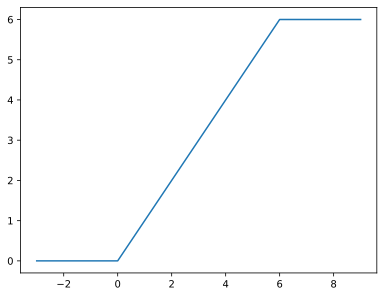

In [17]:
x = torch.linspace(-3,9,101)
relu6 = torch.nn.ReLU6()

plt.plot(x,relu6(x))
plt.show()

### Differences between torch and torch.nn

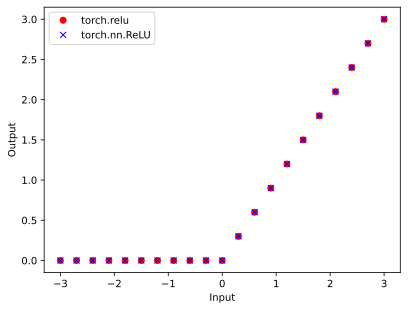

In [18]:
# redefine x (fewer points to facilitate visualization)
x = torch.linspace(-3,3,21)

y1 = torch.relu(x)

f = torch.nn.ReLU()
y2 = f(x)

plt.plot(x,y1,'ro',label='torch.relu')
plt.plot(x,y2,'bx',label='torch.nn.ReLU')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

### Aditional for myself

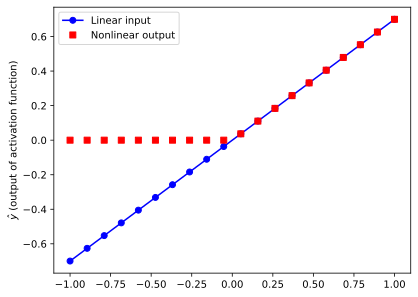

In [19]:
x1 = torch.linspace(-1,1,20)
x2 = 2*x1

w1 = -.3
w2 = .5

# linear combination
linpart = x1*w1 + x2*w2

# nonlinear output
y = torch.relu(linpart)

plt.plot(x1,linpart,'bo-',label='Linear input')
plt.plot(x1,y,'rs',label='Nonlinear output')
plt.ylabel("$\\hat{y}$ (output of activation function)")
# plt.ylim([-.1,.1])
plt.legend()
plt.show()